In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#To make the data easier to read
plt.rcParams['figure.figsize'] = (10, 10)
sns.set()

In [3]:
#Read data into a DataFrame
login_df = pd.io.json.read_json('logins.json')
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#Examine shape
login_df.shape

(93142, 1)

In [6]:
#Examine dataframe itself
login_df.head(15)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [7]:
#Create a column so that each entry has a request number assigned to it
login_df['request_num'] =1
login_df.set_index('login_time', inplace=True)
login_df.head()

,request_num
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
#Group data by 15 minute intervals. 
#The request num columns let's us see how many request fall under each interval.
group_df = login_df.resample('15Min').sum()
group_df

,request_num
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


<AxesSubplot:xlabel='login_time', ylabel='request_num'>

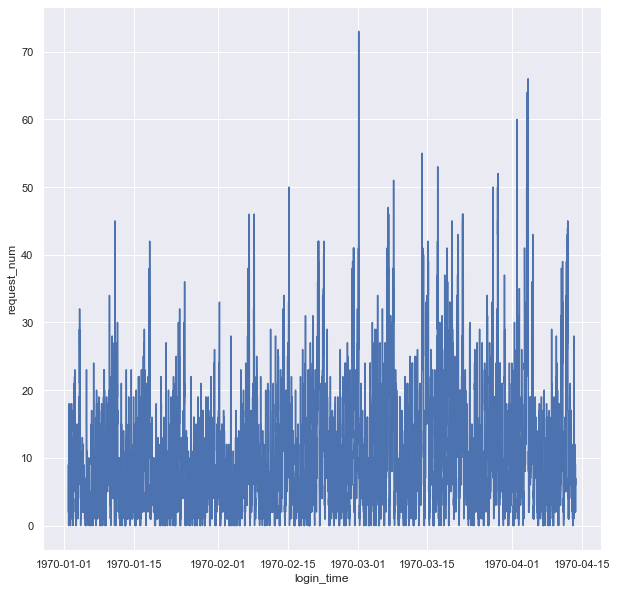

In [9]:
#Plot a line graph to get an idea of how the data looks over time. 
#Data is pretty sporadic. Let's examine smaller time frames 
sns.lineplot(y='request_num', x=group_df.index, data=group_df)

Text(0.5, 1.0, 'Requests per Day of Week')

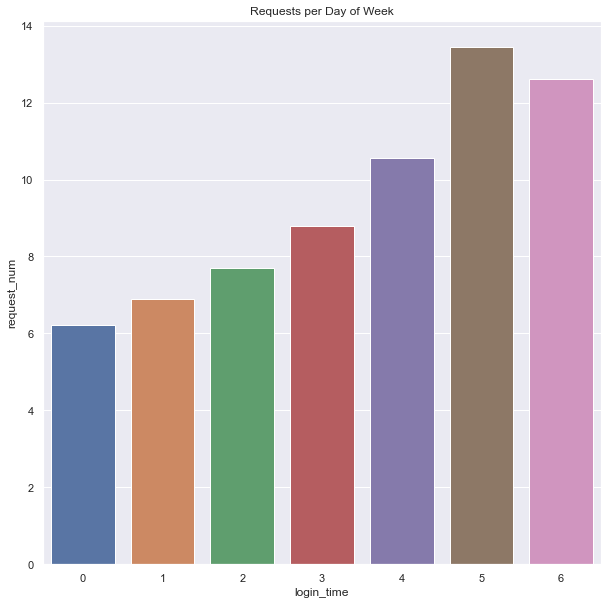

In [25]:
#Plot requests by day of week, 0 being Monday and 6 Sunday
#Request numbers climb from Monday until the weekend, hitting their peak Saturday.
weekday = group_df.groupby([group_df.index.weekday])['request_num'].mean()
sns.barplot(x=weekday.index, y=weekday)
plt.title('Requests per Day of Week')

Text(0.5, 1.0, 'Requests per Day of Month')

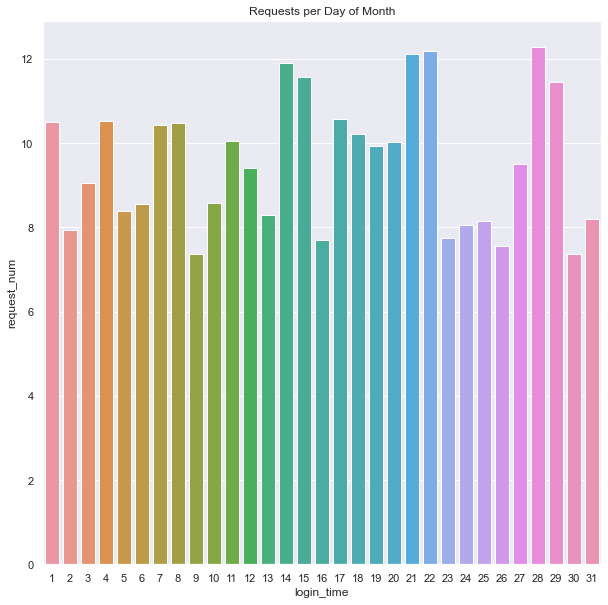

In [27]:
#Plot request by month
#Data seems a bit inconsistent here, probably due to only a few months being in the dataset
month = group_df.groupby([group_df.index.day])['request_num'].mean()
sns.barplot(x=month.index, y=month)
plt.title('Requests per Day of Month')

Text(0.5, 1.0, 'Average Requests per Hour of Day')

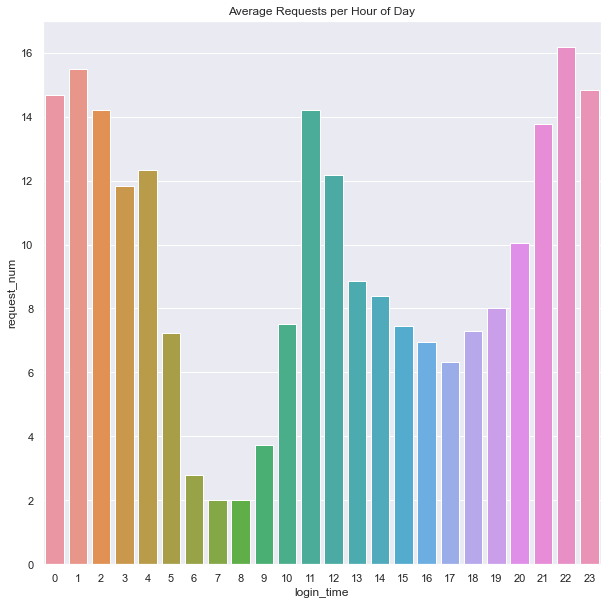

In [29]:
#Finally plot requests by day. This seems to have the most useful information
#Requests are high during the night and are low in mornings and evenings. 
#There is a peak around 11 in the morning as well
day = group_df.groupby([group_df.index.hour])['request_num'].mean()
sns.barplot(x=day.index, y=day)
plt.title('Average Requests per Hour of Day')